In [1]:
import numpy as np
import qutip as qt

import pulsee.plot as psplt

import operators as op

# from global_constants import CLEAN_1000, RHO_1000

pi = np.pi
identity = qt.tensor(op.id, op.id)

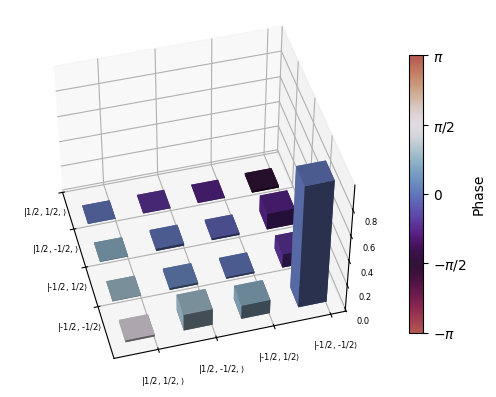

These are not really the deviations we are seeing, which suggests that our 90 degree pulses are fairly well aligned


In [128]:
theta=(np.pi/2) 
omega=np.pi/18
CNOT = op.Rx_S((np.pi / 2)+omega) * op.UJ * op.Ry_S((np.pi / 2)+omega)
Z=op.Rx_I((np.pi / 2)+omega)*op.Ry_I((np.pi / 2)+omega)*op.Rx_I(-((np.pi / 2)+omega))*op.Rx_S((np.pi / 2)+omega)*op.Ry_S(-((np.pi / 2)+omega))*op.Rx_S(-((np.pi / 2)+omega))
CNOT_Phased_miss = Z * CNOT
psplt.plot_complex_density_matrix(CNOT_Phased_miss*op.CLEAN_0010*CNOT_Phased_miss.dag())
print("These are not really the deviations we are seeing, which suggests that our 90 degree pulses are fairly well aligned")

In [142]:
#45-J evolve-45
omega_1=10
omega_2=10
J = 22
t = 1 / (2 * J)

U_J_levitt = qt.Qobj((-1j * np.pi * op.IzSz)).expm()  # J coupling with wait time t = 1/(2J). Levitt pg 398
U_J_levitt_chemical_shift_1 = qt.Qobj((-1j * omega_1 * t * op.Iz)).expm()
U_J_levitt_chemical_shift_2 = qt.Qobj((-1j * omega_2 * t * op.Sz)).expm()
U_J_levitt_full = U_J_levitt_chemical_shift_1 * U_J_levitt_chemical_shift_2 * U_J_levitt

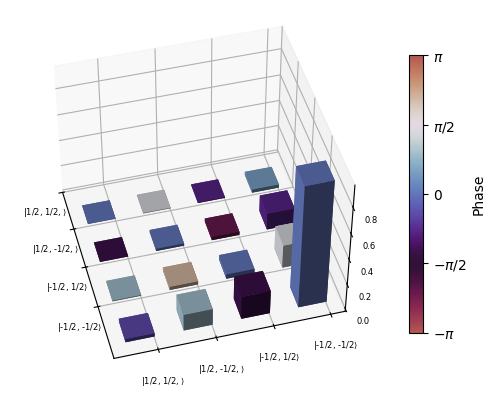

The off diagonals have slightly changed colors, but adding in chemical shift of 10Hz from doublet does not seem to make a huge difference. only expect major deviation at t=pi/omega


In [143]:
theta=(np.pi/2) 
omega=np.pi/18
CNOT = op.Rx_S((np.pi / 2)+omega) * U_J_levitt_full * op.Ry_S((np.pi / 2)+omega)
Z=op.Rx_I((np.pi / 2)+omega)*op.Ry_I((np.pi / 2)+omega)*op.Rx_I(-((np.pi / 2)+omega))*op.Rx_S((np.pi / 2)+omega)*op.Ry_S(-((np.pi / 2)+omega))*op.Rx_S(-((np.pi / 2)+omega))
CNOT_Phased_miss = Z * CNOT
psplt.plot_complex_density_matrix(CNOT_Phased_miss*op.CLEAN_0010*CNOT_Phased_miss.dag())
print("The off diagonals have slightly changed colors, but adding in chemical shift of 10Hz from doublet does not seem to make a huge difference. only expect major deviation at t=pi/omega")

In [179]:
t_pulse=.0027
H_paper = np.pi * J * 2 * op.IzSz  #from our paper
U_J_paper = qt.Qobj(-1j * H_paper * t_pulse).expm()
U_J_mixed_full_pulse = U_J_levitt_chemical_shift_1 * U_J_levitt_chemical_shift_2 * U_J_paper

U_J_mixed_full_pulse = U_J_paper

def Rx_I(theta1):
    return op.Rx_I(theta1/2)*U_J_mixed_full_pulse*op.Rx_I(theta1/2)


def Ry_I(theta1):
    return op.Ry_I(theta1/2)*U_J_mixed_full_pulse*op.Ry_I(theta1/2)

def Rx_S(theta1):
    return op.Rx_S(theta1/2)*U_J_mixed_full_pulse*op.Rx_S(theta1/2)

def Ry_S(theta1):
    return op.Ry_S(theta1/2)*U_J_mixed_full_pulse*op.Ry_S(theta1/2)

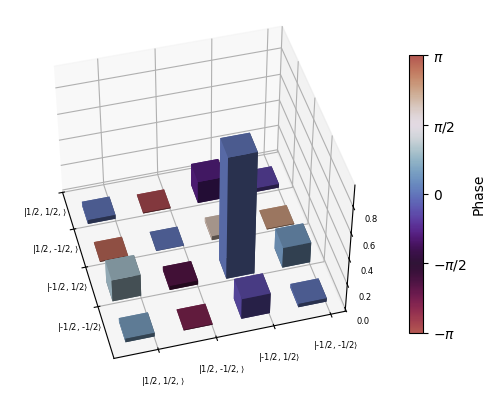

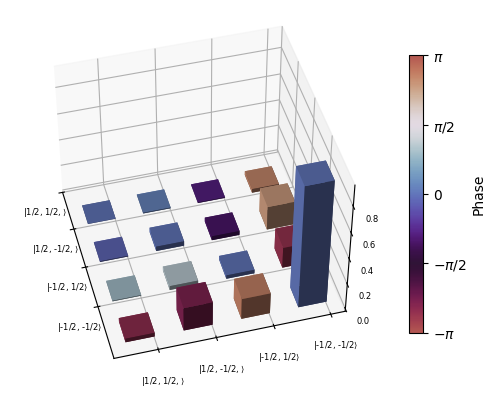

Effects from just finite pulse J coupling evolution


In [180]:
theta=(np.pi/2) 
omega=0

CNOT = Rx_S((np.pi / 2)+omega) * U_J_levitt_full * Ry_S((np.pi / 2)+omega)
Z=Rx_I((np.pi / 2)+omega)*Ry_I((np.pi / 2)+omega)*Rx_I(-((np.pi / 2)+omega))*Rx_S((np.pi / 2)+omega)*Ry_S(-((np.pi / 2)+omega))*Rx_S(-((np.pi / 2)+omega))
CNOT_Phased_miss = Z * CNOT
psplt.plot_complex_density_matrix(CNOT_Phased_miss*op.CLEAN_0001*CNOT_Phased_miss.dag())
psplt.plot_complex_density_matrix(CNOT_Phased_miss*op.CLEAN_0010*CNOT_Phased_miss.dag())
print("Effects from just finite pulse J coupling evolution")

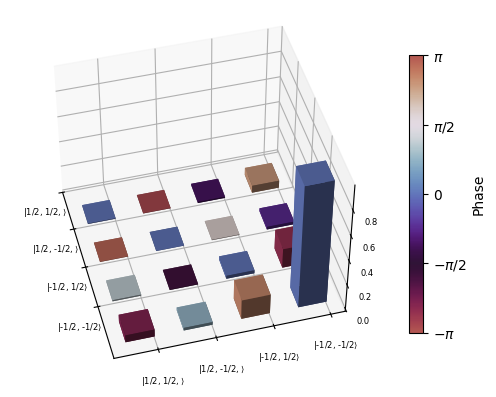

Effects from just finite pulse J coupling evolution


In [214]:
omega_1=4
omega_2=0
U_J_levitt_chemical_shift_1 = qt.Qobj((-1j * omega_1 * t * op.Iz)).expm()
U_J_levitt_chemical_shift_2 = qt.Qobj((-1j * omega_2 * t * op.Sz)).expm()
U_J_mixed_full_pulse = U_J_levitt_chemical_shift_1 * U_J_levitt_chemical_shift_2 * U_J_paper
U_J_mixed_full_pulse = U_J_paper*U_J_levitt_chemical_shift_2 *U_J_levitt_chemical_shift_1

theta=(np.pi/2) 
omega=np.pi/36
omega=0

CNOT = Rx_S((np.pi / 2)+omega) * U_J_levitt_full * Ry_S((np.pi / 2)+omega)
Z=Rx_I((np.pi / 2)+omega)*Ry_I((np.pi / 2)+omega)*Rx_I(-((np.pi / 2)+omega))*Rx_S((np.pi / 2)+omega)*Ry_S(-((np.pi / 2)+omega))*Rx_S(-((np.pi / 2)+omega))
CNOT_Phased_miss = Z * CNOT
psplt.plot_complex_density_matrix(CNOT_Phased_miss*op.CLEAN_0010*CNOT_Phased_miss.dag())
print("Effects from just finite pulse J coupling evolution")